# Medical Insurance Charges Analysis using Regression

This project analyzes a medical insurance dataset to identify the key factors
affecting insurance charges and to build regression models for predicting costs.

Workflow:
- Handle missing values represented by '?'
- Data preprocessing
- Exploratory Data Analysis (EDA)
- Linear Regression
- Ridge Regression


## Step 1: Import Required Libraries

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

## Step 2: Load the Dataset

In [159]:
df = pd.read_csv("insurance.csv",header=None)
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers

### View First Few Records

In [160]:
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


## Step 3: Dataset Information

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


### Observations from Dataset Info

- The dataset contains missing or invalid values represented by the character '?'.
- These values must be handled for all columns before applying regression models.

## Step 4: Handling Missing Values Represented by '?'

All '?' values across the dataset are treated as missing values (NaN).


In [162]:
df.replace('?', np.nan, inplace = True)

## Step 5: Convert Columns to Numeric Format

Columns are converted to numeric values.
Invalid conversions are set to NaN.

In [163]:
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
# Fill missing smoker values
df["smoker"] = df["smoker"].fillna(is_smoker)


# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
# Fill missing age values
df["age"] = df["age"].fillna(mean_age)

# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB
None


### Check Missing Values After Conversion

In [164]:
df[["charges"]] = np.round(df[["charges"]],2)
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86
5,31,1,25.740,0,0,4,3756.62
6,46,1,33.440,1,0,4,8240.59
7,37,1,27.740,3,0,1,7281.51
8,37,2,29.830,2,0,2,6406.41
9,60,1,25.840,0,0,1,28923.14


### Verify Dataset After Cleaning

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


## Step 7: Statistical Summary

In [166]:
df.describe()

,age,gender,bmi,no_of_children,smoker,region,charges
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,1.507215,30.701349,1.101732,0.203463,2.559885,13261.369957
std,14.081459,0.500038,6.129449,1.214806,0.402647,1.130761,12151.768970
min,18.000000,1.000000,15.960000,0.000000,0.000000,1.000000,1121.870000
25%,26.000000,1.000000,26.220000,0.000000,0.000000,2.000000,4687.800000
50%,39.000000,2.000000,30.447500,1.000000,0.000000,3.000000,9333.015000
75%,51.000000,2.000000,34.770000,2.000000,0.000000,4.000000,16577.780000
max,64.000000,2.000000,53.130000,5.000000,1.000000,4.000000,63770.430000


## Step 8: Exploratory Data Analysis (EDA)

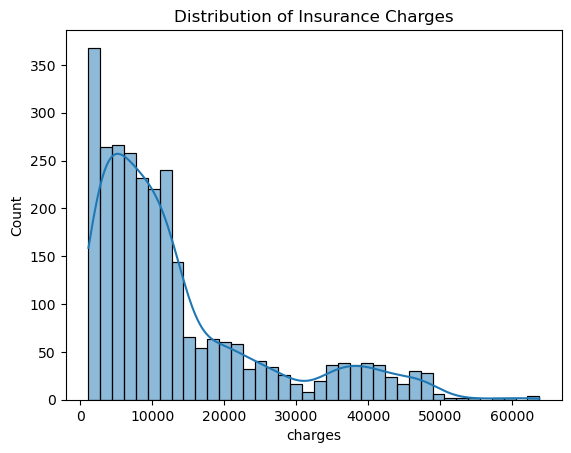

In [167]:
plt.figure()
sns.histplot(df['charges'], kde=True)
plt.title("Distribution of Insurance Charges")
plt.show()

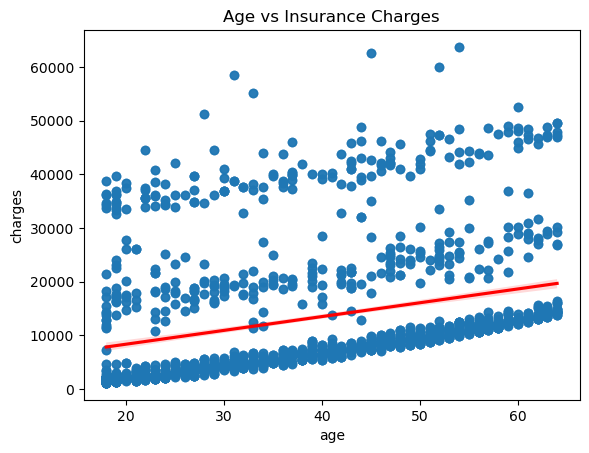

In [168]:
plt.figure()
sns.regplot(x="age", y="charges", data=df, line_kws={"color": "red"})
plt.title("Age vs Insurance Charges")
plt.show()


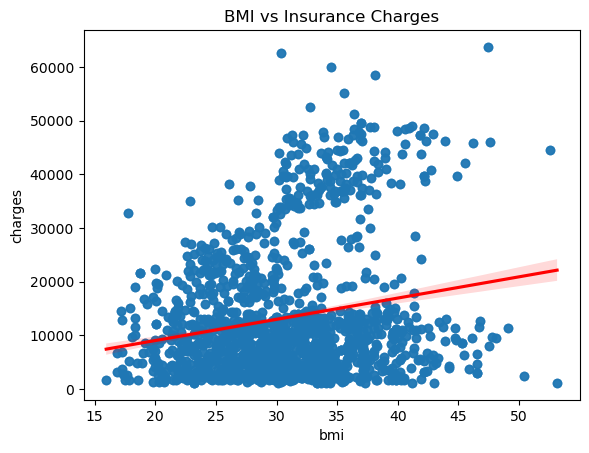

In [169]:
plt.figure()
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.title("BMI vs Insurance Charges")
plt.show()

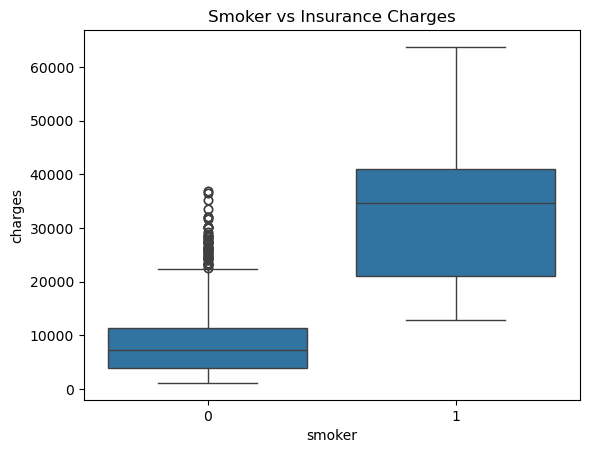

In [170]:
plt.figure()
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Smoker vs Insurance Charges")
plt.show()


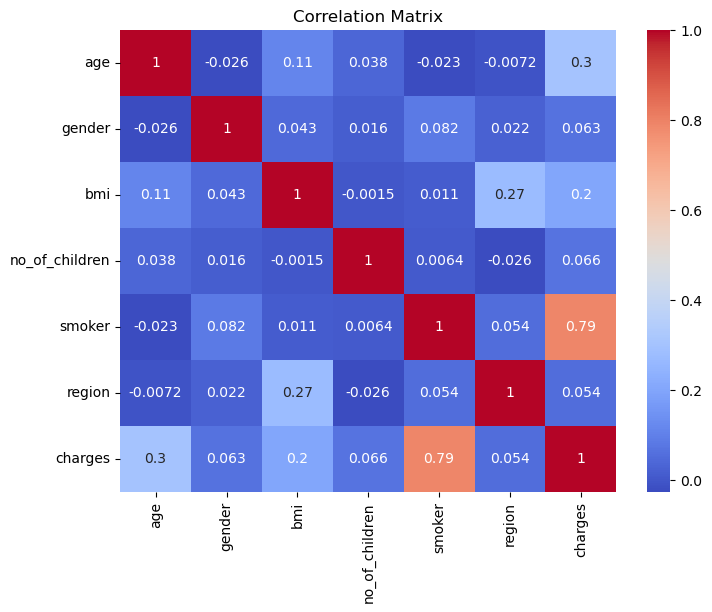

In [171]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Step 9: Single Variable Linear Regression (smoker→ Charges)


In [172]:
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))

0.6221791733924185


## Step 10: Multi Variable Linear Regression and Pipeline

In [173]:
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))

0.7504083820289634


Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset. There should be even further improvement in the performance.

In [174]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))

0.8452576213500093


## Step 11: Ridge Regression

In [177]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.Initializing a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.

In [184]:
X_train, X_test, y_train, y_test = train_test_split(
    Z, y, test_size=0.2, random_state=1
)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R2 Score: 0.676273682635092
Mean Squared Error: 42662700.00959959


Applying polynomial transformation to the training parameters with degree=2. Using this transformed feature set to fit the same regression model, as above, using the training subset.

In [185]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(X_train)
x_test_pr = pr.transform(X_test)
ridge.fit(x_train_pr, y_train)
y_hat = ridge.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7832846952432604
